In [3]:
## Starter code

import pandas as pd
import numpy as np


# The following statements should get the three data files loaded as DataFrames. 

airlines = pd.read_csv("../resource/asnlib/publicdata/airlines.csv")
airports = pd.read_csv("../resource/asnlib/publicdata/airports.csv")
flights  = pd.read_csv("https://www3.nd.edu/~jng2/flights_20_perc.csv") 
# the flights file is ~140mb so will take a few seconds to load

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.set_option('display.max_rows', 500)  
pd.set_option('display.max_columns', 500)  

In [6]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [7]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [8]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,10,14,3,UA,356,N494UA,11618,13930,1945,1948.0,3.0,21.0,2009.0,159.0,136.0,108.0,719,2057.0,7.0,2124,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,27,2,MQ,3458,N671MQ,ORD,MLI,820,933.0,73.0,50.0,1023.0,53.0,87.0,34.0,139,1057.0,3.0,913,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0
2,2015,7,6,1,B6,1202,N535JB,FLL,JFK,1507,1522.0,15.0,13.0,1535.0,186.0,167.0,146.0,1069,1801.0,8.0,1813,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,6,13,6,DL,2529,N301DQ,ATL,CLE,2204,2204.0,0.0,22.0,2226.0,108.0,99.0,72.0,554,2338.0,5.0,2352,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,6,6,6,WN,2560,N7729A,CLT,BWI,1325,1335.0,10.0,20.0,1355.0,95.0,84.0,59.0,361,1454.0,5.0,1500,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [10]:
flights['DEPDELAY_CNT'] = flights['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)
flights['ARRDELAY_CNT'] = flights['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPDELAY_CNT,ARRDELAY_CNT
0,2015,10,14,3,UA,356,N494UA,11618,13930,1945,1948.0,3.0,21.0,2009.0,159.0,136.0,108.0,719,2057.0,7.0,2124,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,2015,1,27,2,MQ,3458,N671MQ,ORD,MLI,820,933.0,73.0,50.0,1023.0,53.0,87.0,34.0,139,1057.0,3.0,913,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0,1,1
2,2015,7,6,1,B6,1202,N535JB,FLL,JFK,1507,1522.0,15.0,13.0,1535.0,186.0,167.0,146.0,1069,1801.0,8.0,1813,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,2015,6,13,6,DL,2529,N301DQ,ATL,CLE,2204,2204.0,0.0,22.0,2226.0,108.0,99.0,72.0,554,2338.0,5.0,2352,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,2015,6,6,6,WN,2560,N7729A,CLT,BWI,1325,1335.0,10.0,20.0,1355.0,95.0,84.0,59.0,361,1454.0,5.0,1500,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [11]:
flights['SCHEDULED_DEP_HR'] = flights['SCHEDULED_DEPARTURE']//100
flights['SCHEDULED_ARR_HR'] = flights['SCHEDULED_ARRIVAL']//100
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPDELAY_CNT,ARRDELAY_CNT,SCHEDULED_DEP_HR,SCHEDULED_ARR_HR
0,2015,10,14,3,UA,356,N494UA,11618,13930,1945,1948.0,3.0,21.0,2009.0,159.0,136.0,108.0,719,2057.0,7.0,2124,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,19,21
1,2015,1,27,2,MQ,3458,N671MQ,ORD,MLI,820,933.0,73.0,50.0,1023.0,53.0,87.0,34.0,139,1057.0,3.0,913,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0,1,1,8,9
2,2015,7,6,1,B6,1202,N535JB,FLL,JFK,1507,1522.0,15.0,13.0,1535.0,186.0,167.0,146.0,1069,1801.0,8.0,1813,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,15,18
3,2015,6,13,6,DL,2529,N301DQ,ATL,CLE,2204,2204.0,0.0,22.0,2226.0,108.0,99.0,72.0,554,2338.0,5.0,2352,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,22,23
4,2015,6,6,6,WN,2560,N7729A,CLT,BWI,1325,1335.0,10.0,20.0,1355.0,95.0,84.0,59.0,361,1454.0,5.0,1500,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,13,15


## 1. Do flight delays happen more often later in the day compared to earlier in the day?

## A new field measuring frequency
### We will be measuring how often delays or cancellations occur using the Relative Frequency calculated as the count of delays (for a specific group) divided by the total flights scheduled (in that group). The reason for this is that this calculation is a relative measure that is more objective than the absolute value.

In [12]:
# Examine delays for departure
depdelay = flights.groupby('SCHEDULED_DEP_HR')['DEPDELAY_CNT','SCHEDULED_DEPARTURE'].aggregate(
                    {'DEPDELAY_CNT':'sum',
                     'SCHEDULED_DEPARTURE':'count'}).reset_index()
depdelay['RELATIVE_FREQ'] = depdelay['DEPDELAY_CNT']/depdelay['SCHEDULED_DEPARTURE']
depdelay

,SCHEDULED_DEP_HR,DEPDELAY_CNT,SCHEDULED_DEPARTURE,RELATIVE_FREQ
0,0,1072,2918,0.367375
1,1,359,1009,0.355798
2,2,99,302,0.327815
3,3,53,129,0.410853
4,4,41,113,0.362832
5,5,3934,23397,0.168141
6,6,14408,81870,0.175986
7,7,16822,79407,0.211845
8,8,19680,76478,0.257329
9,9,21269,70223,0.302878


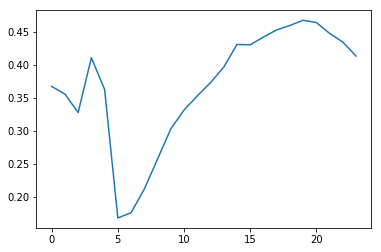

In [13]:
figure, axes = plt.subplots()
axes.plot(depdelay['SCHEDULED_DEP_HR'], depdelay['RELATIVE_FREQ'])

### We can see that for departure, delays happen more often later in the day than earlier in the day. However, delays happen also pretty frequently early in the morning given that less flights are scheduled.

In [14]:
# Examine delays for arrival
arrdelay = flights.groupby('SCHEDULED_ARR_HR')['ARRDELAY_CNT','SCHEDULED_ARRIVAL'].aggregate(
                    {'ARRDELAY_CNT':'sum',
                     'SCHEDULED_ARRIVAL':'count'}).reset_index()
arrdelay['RELATIVE_FREQ'] = arrdelay['ARRDELAY_CNT']/arrdelay['SCHEDULED_ARRIVAL']
arrdelay

,SCHEDULED_ARR_HR,ARRDELAY_CNT,SCHEDULED_ARRIVAL,RELATIVE_FREQ
0,0,5976,14230,0.419958
1,1,1106,2655,0.416573
2,2,240,642,0.373832
3,3,150,287,0.522648
4,4,443,1227,0.361043
5,5,2644,8087,0.326944
6,6,4633,17915,0.258610
7,7,9117,38766,0.235180
8,8,14639,56023,0.261303
9,9,19040,69786,0.272834


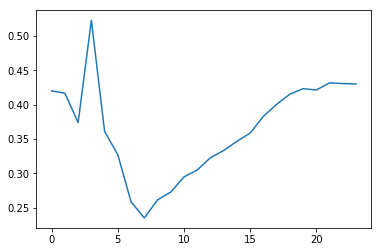

In [15]:
figure, axes = plt.subplots()
axes.plot(arrdelay['SCHEDULED_ARR_HR'], arrdelay['RELATIVE_FREQ'])

### In fact, for arrival, flights are more frequently delayed early in the morning, even though delays increase steadily later in the day.


# 2. Does the response to Claim 1 depend on the month of the year?

In [16]:
# Examine delays for departure
depdelay_month = flights.groupby(['MONTH','SCHEDULED_DEP_HR'])['DEPDELAY_CNT','SCHEDULED_DEPARTURE'].aggregate(
                    {'DEPDELAY_CNT':'sum',
                     'SCHEDULED_DEPARTURE':'count'}).reset_index()
depdelay_month['RELATIVE_FREQ'] = depdelay_month['DEPDELAY_CNT']/depdelay_month['SCHEDULED_DEPARTURE']
depdelay_month.head(24)

,MONTH,SCHEDULED_DEP_HR,DEPDELAY_CNT,SCHEDULED_DEPARTURE,RELATIVE_FREQ
0,1,0,40,148,0.270270
1,1,1,34,100,0.340000
2,1,2,12,29,0.413793
3,1,3,8,9,0.888889
4,1,4,10,22,0.454545
5,1,5,217,1207,0.179785
6,1,6,1211,6610,0.183207
7,1,7,1291,6132,0.210535
8,1,8,1856,6606,0.280957
9,1,9,1880,5913,0.317944


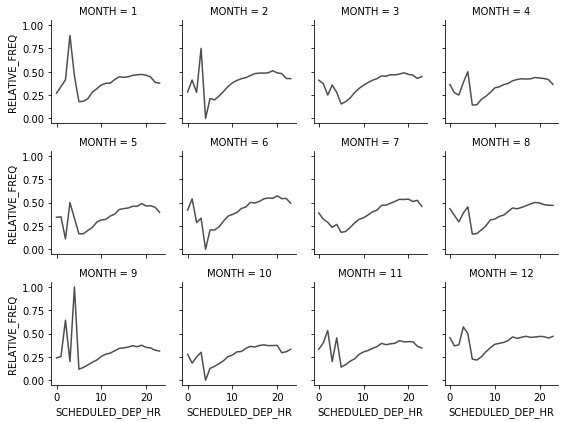

In [17]:
depdelay_month_g = sns.FacetGrid(depdelay_month, col="MONTH", col_wrap=4, height=2)
depdelay_month_g.map(sns.lineplot, "SCHEDULED_DEP_HR", "RELATIVE_FREQ", color='0.3')

### For departure, we can see that delays follow the same pattern as stated by Claim 1 regardless of month except for Janurary, Feburary, April, September, November, and December, during which the maximum frequency of delays later in the day exceeds that earlier in the day.

In [18]:
# Examine delays for arrival
arrdelay_month = flights.groupby(['MONTH','SCHEDULED_ARR_HR'])['ARRDELAY_CNT','SCHEDULED_ARRIVAL'].aggregate(
                    {'ARRDELAY_CNT':'sum',
                     'SCHEDULED_ARRIVAL':'count'}).reset_index()
arrdelay_month['RELATIVE_FREQ'] = arrdelay_month['ARRDELAY_CNT']/arrdelay_month['SCHEDULED_ARRIVAL']
arrdelay_month.head()

,MONTH,SCHEDULED_ARR_HR,ARRDELAY_CNT,SCHEDULED_ARRIVAL,RELATIVE_FREQ
0,1,0,350,719,0.486787
1,1,1,41,96,0.427083
2,1,2,9,22,0.409091
3,1,3,14,31,0.451613
4,1,4,47,115,0.408696


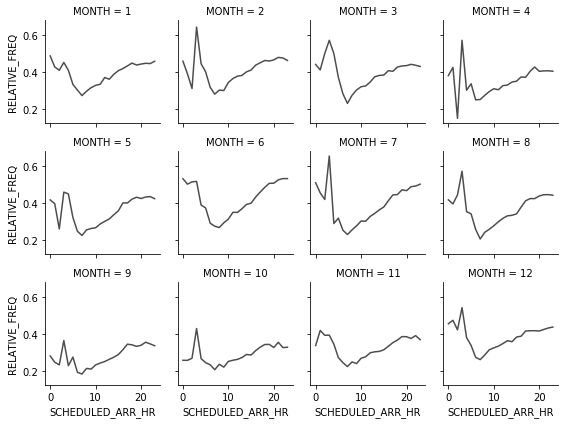

In [19]:
arrdelay_month_g = sns.FacetGrid(arrdelay_month, col="MONTH", col_wrap=4, height=2)
arrdelay_month_g.map(sns.lineplot, "SCHEDULED_ARR_HR", "RELATIVE_FREQ", color='0.3')

### Claim 1 is true for all months except January, May, June, November and September, during which delays are almost equally likely both in earlier in the day and later in the day.

# 3. Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced?

In [20]:
# IATA_CODE in airlines should actually be the code for the airline.
airlines = airlines.rename(columns={'IATA_CODE':'AIRLINE_CODE'})
airlines

,AIRLINE_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [21]:
# Rename the AIRLINE column in flights to keep the names consistent. 
flights = flights.rename(columns={'AIRLINE':'AIRLINE_CODE'})
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPDELAY_CNT,ARRDELAY_CNT,SCHEDULED_DEP_HR,SCHEDULED_ARR_HR
0,2015,10,14,3,UA,356,N494UA,11618,13930,1945,1948.0,3.0,21.0,2009.0,159.0,136.0,108.0,719,2057.0,7.0,2124,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,19,21
1,2015,1,27,2,MQ,3458,N671MQ,ORD,MLI,820,933.0,73.0,50.0,1023.0,53.0,87.0,34.0,139,1057.0,3.0,913,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0,1,1,8,9
2,2015,7,6,1,B6,1202,N535JB,FLL,JFK,1507,1522.0,15.0,13.0,1535.0,186.0,167.0,146.0,1069,1801.0,8.0,1813,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,15,18
3,2015,6,13,6,DL,2529,N301DQ,ATL,CLE,2204,2204.0,0.0,22.0,2226.0,108.0,99.0,72.0,554,2338.0,5.0,2352,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,22,23
4,2015,6,6,6,WN,2560,N7729A,CLT,BWI,1325,1335.0,10.0,20.0,1355.0,95.0,84.0,59.0,361,1454.0,5.0,1500,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,13,15


In [22]:
# Merge the airlines and flights
p3 = pd.merge(airlines,flights,left_on='AIRLINE_CODE',right_on='AIRLINE_CODE',how='inner')
p3.head()

,AIRLINE_CODE,AIRLINE,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPDELAY_CNT,ARRDELAY_CNT,SCHEDULED_DEP_HR,SCHEDULED_ARR_HR
0,UA,United Air Lines Inc.,2015,10,14,3,356,N494UA,11618,13930,1945,1948.0,3.0,21.0,2009.0,159.0,136.0,108.0,719,2057.0,7.0,2124,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,19,21
1,UA,United Air Lines Inc.,2015,5,31,7,1016,N17233,BWI,IAH,711,709.0,-2.0,14.0,723.0,206.0,190.0,165.0,1235,908.0,11.0,937,919.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,7,9
2,UA,United Air Lines Inc.,2015,5,2,6,1676,N26208,SFO,FLL,2230,2224.0,-6.0,18.0,2242.0,335.0,331.0,309.0,2584,651.0,4.0,705,655.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,22,7
3,UA,United Air Lines Inc.,2015,11,10,2,1762,N479UA,PHL,SFO,1821,1944.0,83.0,11.0,1955.0,379.0,347.0,331.0,2521,2226.0,5.0,2140,2231.0,51.0,0,0,NaN,0.0,0.0,0.0,45.0,6.0,1,1,18,21
4,UA,United Air Lines Inc.,2015,3,1,7,1719,N37293,DEN,MCO,1535,1617.0,42.0,13.0,1630.0,203.0,206.0,185.0,1546,2135.0,8.0,2058,2143.0,45.0,0,0,NaN,3.0,0.0,42.0,0.0,0.0,1,1,15,20


In [23]:
# Examine delays for departure
depdelay_airline = p3.groupby(['AIRLINE_CODE','SCHEDULED_DEP_HR'])['DEPDELAY_CNT','SCHEDULED_DEPARTURE'].aggregate(
                    {'DEPDELAY_CNT':'sum',
                     'SCHEDULED_DEPARTURE':'count'}).reset_index()
depdelay_airline['RELATIVE_FREQ'] = depdelay_airline['DEPDELAY_CNT']/depdelay_airline['SCHEDULED_DEPARTURE']
depdelay_airline.head(24)

,AIRLINE_CODE,SCHEDULED_DEP_HR,DEPDELAY_CNT,SCHEDULED_DEPARTURE,RELATIVE_FREQ
0,AA,0,296,853,0.347011
1,AA,1,82,229,0.358079
2,AA,2,4,6,0.666667
3,AA,5,655,3575,0.183217
4,AA,6,1561,8849,0.176404
5,AA,7,2651,12810,0.206948
6,AA,8,2203,9257,0.237982
7,AA,9,2356,8426,0.279611
8,AA,10,2889,8865,0.325888
9,AA,11,2674,8678,0.308136


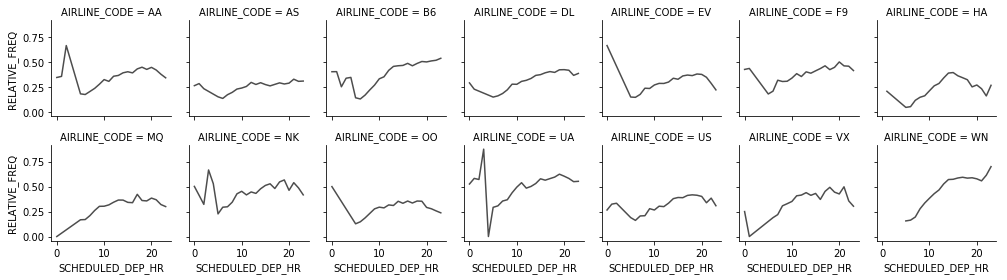

In [24]:
depdelay_airline_g = sns.FacetGrid(depdelay_airline, col="AIRLINE_CODE", col_wrap=7, height=2)
depdelay_airline_g.map(sns.lineplot, "SCHEDULED_DEP_HR", "RELATIVE_FREQ", color='0.3')

### For departure, Claim 1 does not seem to be true universally anymore when airlines are taken into account. Each airline has its own delay frequency pattern. We can see that UA (United Airlines) and WN (Southwest Airlines) have the most pronounced delays.

In [25]:
# Examine delays for arrival
arrdelay_airline = p3.groupby(['AIRLINE_CODE','SCHEDULED_ARR_HR'])['ARRDELAY_CNT','SCHEDULED_ARRIVAL'].aggregate(
                    {'ARRDELAY_CNT':'sum',
                     'SCHEDULED_ARRIVAL':'count'}).reset_index()
arrdelay_airline['RELATIVE_FREQ'] = arrdelay_airline['ARRDELAY_CNT']/arrdelay_airline['SCHEDULED_ARRIVAL']
arrdelay_airline.head(24)

,AIRLINE_CODE,SCHEDULED_ARR_HR,ARRDELAY_CNT,SCHEDULED_ARRIVAL,RELATIVE_FREQ
0,AA,0,726,1933,0.375582
1,AA,1,151,406,0.371921
2,AA,2,38,101,0.376238
3,AA,3,2,8,0.250000
4,AA,4,8,75,0.106667
5,AA,5,280,1010,0.277228
6,AA,6,696,2647,0.262939
7,AA,7,743,2940,0.252721
8,AA,8,1838,6802,0.270215
9,AA,9,2287,8182,0.279516


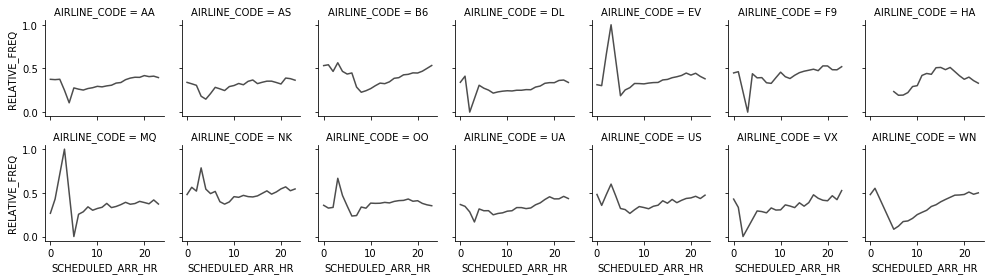

In [26]:
arrdelay_airline_g = sns.FacetGrid(arrdelay_airline, col="AIRLINE_CODE", col_wrap=7, height=2)
arrdelay_airline_g.map(sns.lineplot, "SCHEDULED_ARR_HR", "RELATIVE_FREQ", color='0.3')

### We can see that Claim cannot apply to all airlines in terms of arrival. For example, we can see that HA (Hawaiian Airlines) clearly has more delays later in the day than early in the day.

# 4. Do flight cancellation happen more often later in the day than earlier in the day?

In [27]:
p4 = p3

In [28]:
# Examine flight cancellations for departure
depcancel = p4.groupby(['SCHEDULED_DEP_HR'])['CANCELLED'].aggregate(
                    ['sum','count']).reset_index().rename(columns={'sum':'CANCELLED_CNT',
                                                                   'count':'TOTAL'})
depcancel['RELATIVE_FREQ'] = depcancel['CANCELLED_CNT']/depcancel['TOTAL']
depcancel.head(24)

,SCHEDULED_DEP_HR,CANCELLED_CNT,TOTAL,RELATIVE_FREQ
0,0,29,2918,0.009938
1,1,6,1009,0.005946
2,2,5,302,0.016556
3,3,2,129,0.015504
4,4,1,113,0.008850
5,5,442,23397,0.018891
6,6,1490,81870,0.018200
7,7,1109,79407,0.013966
8,8,1117,76478,0.014606
9,9,879,70223,0.012517


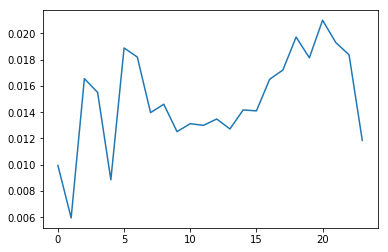

In [29]:
figure, axes = plt.subplots()
axes.plot(depcancel['SCHEDULED_DEP_HR'], depcancel['RELATIVE_FREQ'])

### For departure, flights can be cancelled both early and late in the day. There are two peaks of flight cancellations. One at around 5:00, the other 20:00. Between the two peaks cancellations drop first. After noon, cancellations continously increase the the second peak.

In [30]:
# Examine flight cancellations for arrival
arrcancel = p4.groupby(['SCHEDULED_ARR_HR'])['CANCELLED'].aggregate(
                    ['sum','count']).reset_index().rename(columns={'sum':'CANCELLED_CNT',
                                                                   'count':'TOTAL'})
arrcancel['RELATIVE_FREQ'] = arrcancel['CANCELLED_CNT']/arrcancel['TOTAL']
arrcancel.head(24)

,SCHEDULED_ARR_HR,CANCELLED_CNT,TOTAL,RELATIVE_FREQ
0,0,242,14230,0.017006
1,1,61,2655,0.022976
2,2,5,642,0.007788
3,3,6,287,0.020906
4,4,11,1227,0.008965
5,5,74,8087,0.009150
6,6,327,17915,0.018253
7,7,788,38766,0.020327
8,8,935,56023,0.016690
9,9,1039,69786,0.014888


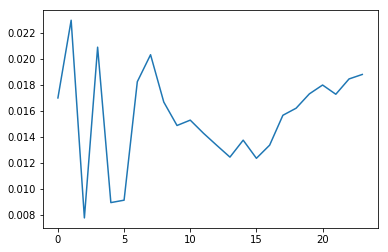

In [31]:
figure, axes = plt.subplots()
axes.plot(arrcancel['SCHEDULED_ARR_HR'], arrcancel['RELATIVE_FREQ'])

### For arrival, flights are more frequently cancelled earlier in the day. That being said, the number of cancellations early in the day can vary significantly from hour to hour, while cancellations later in the day increase steadily. 

## 5. Does the response to Claim 4 depend on the month of the year and on the airline?

In [32]:
# Examine cancellations for departure
p5 = p4
depcancell_month = p5.groupby(['MONTH','SCHEDULED_DEP_HR'])['CANCELLED'].aggregate(
                    ['sum','count']).reset_index().rename(columns={'sum':'CANCELLED_CNT',
                                                                   'count':'TOTAL'})
depcancell_month['RELATIVE_FREQ'] = depcancell_month['CANCELLED_CNT']/depcancell_month['TOTAL']
depcancell_month.head(24)

,MONTH,SCHEDULED_DEP_HR,CANCELLED_CNT,TOTAL,RELATIVE_FREQ
0,1,0,0,148,0.000000
1,1,1,1,100,0.010000
2,1,2,0,29,0.000000
3,1,3,0,9,0.000000
4,1,4,0,22,0.000000
5,1,5,40,1207,0.033140
6,1,6,240,6610,0.036309
7,1,7,172,6132,0.028050
8,1,8,164,6606,0.024826
9,1,9,136,5913,0.023000


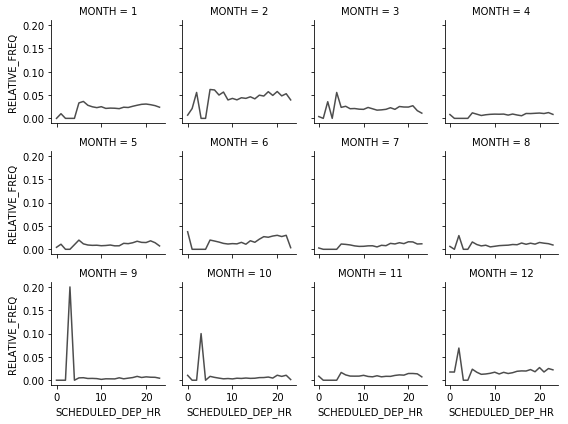

In [33]:
depcancell_month_g = sns.FacetGrid(depcancell_month, col="MONTH", col_wrap=4, height=2)
depcancell_month_g.map(sns.lineplot, "SCHEDULED_DEP_HR", "RELATIVE_FREQ", color='0.3')

### For departure, despite some variance, the general trend stated by Claim 4 holds true for all months except September, October, and December, during which cancellations apparently happen more frequently earlier than late.

In [34]:
# Same analysis for arrival.
arrcancell_month = p4.groupby(['MONTH','SCHEDULED_ARR_HR'])['CANCELLED'].aggregate(
                    ['sum','count']).reset_index().rename(columns={'sum':'CANCELLED_CNT',
                                                                   'count':'TOTAL'})
arrcancell_month['RELATIVE_FREQ'] = arrcancell_month['CANCELLED_CNT']/arrcancell_month['TOTAL']
arrcancell_month.head(24)

,MONTH,SCHEDULED_ARR_HR,CANCELLED_CNT,TOTAL,RELATIVE_FREQ
0,1,0,23,719,0.031989
1,1,1,4,96,0.041667
2,1,2,0,22,0.000000
3,1,3,0,31,0.000000
4,1,4,1,115,0.008696
5,1,5,12,535,0.022430
6,1,6,28,984,0.028455
7,1,7,124,2781,0.044588
8,1,8,136,4427,0.030721
9,1,9,154,5349,0.028790


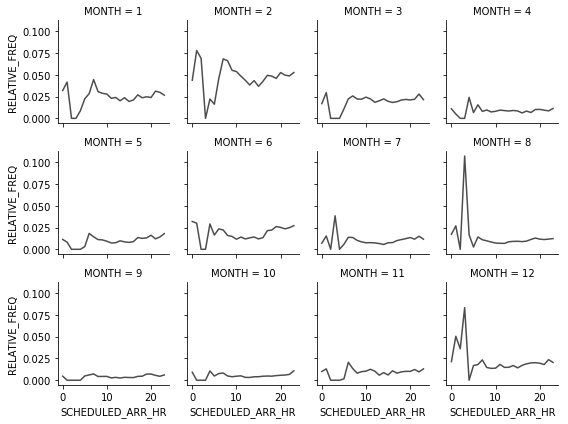

In [35]:
arrcancell_month_g = sns.FacetGrid(arrcancell_month, col="MONTH", col_wrap=4, height=2)
arrcancell_month_g.map(sns.lineplot, "SCHEDULED_ARR_HR", "RELATIVE_FREQ", color='0.3')

### For arrival, Claim 4 holds true for most of the months except March, May, June, September, and October, during which cancellations are both likely early and late in the day.

In [45]:
# Examine cancellations for departure
depcancell_airline = p5.groupby(['AIRLINE_CODE','SCHEDULED_DEP_HR'])['CANCELLED'].aggregate(
                    ['sum','count']).reset_index().rename(columns={'sum':'CANCELLED_CNT',
                                                                   'count':'TOTAL'})
depcancell_airline['RELATIVE_FREQ'] = depcancell_airline['CANCELLED_CNT']/depcancell_airline['TOTAL']
depcancell_airline.head()

,AIRLINE_CODE,SCHEDULED_DEP_HR,CANCELLED_CNT,TOTAL,RELATIVE_FREQ
0,AA,0,8,853,0.009379
1,AA,1,2,229,0.008734
2,AA,2,1,6,0.166667
3,AA,5,62,3575,0.017343
4,AA,6,145,8849,0.016386


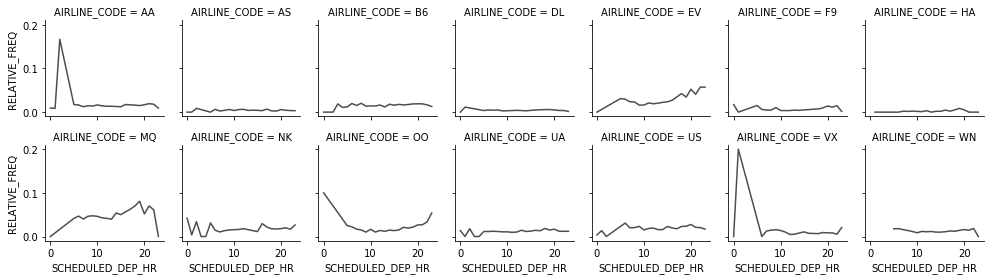

In [46]:
depcancell_airline_g = sns.FacetGrid(depcancell_airline, col="AIRLINE_CODE", col_wrap=7, height=2)
depcancell_airline_g.map(sns.lineplot, "SCHEDULED_DEP_HR", "RELATIVE_FREQ", color='0.3')

### For departure, when we break down cancellations by airlines, we can see that Claim 4 does not hold true. Each airline has its own cancellation patterns.

In [38]:
# Examine cancellations for arrival
arrcancell_airline = p5.groupby(['AIRLINE_CODE','SCHEDULED_ARR_HR'])['CANCELLED'].aggregate(
                    ['sum','count']).reset_index().rename(columns={'sum':'CANCELLED_CNT',
                                                                   'count':'TOTAL'})
arrcancell_airline['RELATIVE_FREQ'] = arrcancell_airline['CANCELLED_CNT']/arrcancell_airline['TOTAL']
arrcancell_airline.head()

,AIRLINE_CODE,SCHEDULED_ARR_HR,CANCELLED_CNT,TOTAL,RELATIVE_FREQ
0,AA,0,40,1933,0.020693
1,AA,1,9,406,0.022167
2,AA,2,2,101,0.019802
3,AA,3,0,8,0.000000
4,AA,4,1,75,0.013333


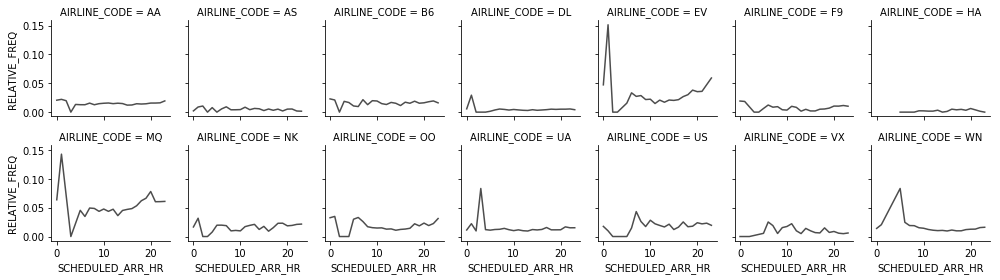

In [39]:
arrcancell_airline_g = sns.FacetGrid(arrcancell_airline, col="AIRLINE_CODE", col_wrap=7, height=2)
arrcancell_airline_g.map(sns.lineplot, "SCHEDULED_ARR_HR", "RELATIVE_FREQ", color='0.3')

### In terms of arrival, while for EV (Atlantic Southeast Airlines), MQ (American Eagles Airlines), UA (United Air Lines), and WN (Southwest Airlines), Claim 4 still holds, variations of cancellations for the other airlines differ.

# 6. State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states are lowest and highest flight delays.

In [66]:
# Examine state-based departure flight delays. Join IATA_CODE in airports and ORIGIN_AIRPORT.
p6_delay = pd.merge(p5,airports,left_on='ORIGIN_AIRPORT',right_on='IATA_CODE',how='left')

Many airports in flights have a code that is not in our airports dataset, so we get NaNs. These would not be helpful for our analysis. Pandas' groupby **ignores** these NaN values, which is what we want.

## 6.1 State-based departure analysis

In [41]:
p6_depdelay = p6_delay.groupby(['STATE'])['DEPDELAY_CNT','SCHEDULED_DEPARTURE'].aggregate(
                    {'DEPDELAY_CNT':'sum',
                     'SCHEDULED_DEPARTURE':'count'}).reset_index()
p6_depdelay['RELATIVE_FREQ'] = p6_depdelay['DEPDELAY_CNT']/p6_depdelay['SCHEDULED_DEPARTURE']
p6_depdelay_top3 = p6_depdelay.sort_values(by='RELATIVE_FREQ',ascending=False).head(3)
p6_depdelay_top3

,STATE,DEPDELAY_CNT,SCHEDULED_DEPARTURE,RELATIVE_FREQ
11,GU,41,62,0.661290
21,MD,8299,17267,0.480628
8,DE,11,24,0.458333


In [42]:
p6_depdelay_bot3 = p6_depdelay.sort_values(by='RELATIVE_FREQ',ascending=False).tail(3)
p6_depdelay_bot3

,STATE,DEPDELAY_CNT,SCHEDULED_DEPARTURE,RELATIVE_FREQ
29,ND,754,3322,0.226972
53,WY,344,1617,0.212740
27,MT,559,3047,0.183459


### We can see that for arrival, the top three states with highest average flight delays are GU (Guam), MD (Maryland), and DE (Delaware). The top three states with lowest average flight delays are ND (North Dakota), WY (Wyoming), and MT (Montana). 

In [43]:
# Examine GU's flight schedules.
p6_delay[p6_delay['STATE']=='GU'].groupby('SCHEDULED_DEP_HR')['SCHEDULED_DEPARTURE'].aggregate('count').reset_index()

,SCHEDULED_DEP_HR,SCHEDULED_DEPARTURE
0,6,41
1,7,21


#### The reason why Guam has the highest departure delay frequency is because it only has departure flights from 6:00 to 7:59. This would make the airport very busy during this time. Also, as low demand probably leads to low airport capacity, flights need to queue for departure.

In [81]:
# Examine MD's flight schedules.
MD_depdelay = p6_delay[p6_delay['STATE']=='MD'].groupby('SCHEDULED_DEP_HR')['SCHEDULED_DEPARTURE','DEPDELAY_CNT'].aggregate(
    {'SCHEDULED_DEPARTURE':'count',
     'DEPDELAY_CNT':'sum'}).reset_index()
MD_depdelay['RELATIVE_FREQ'] = MD_depdelay['DEPDELAY_CNT']/MD_depdelay['SCHEDULED_DEPARTURE']
MD_depdelay = MD_depdelay.sort_values(by='SCHEDULED_DEP_HR')

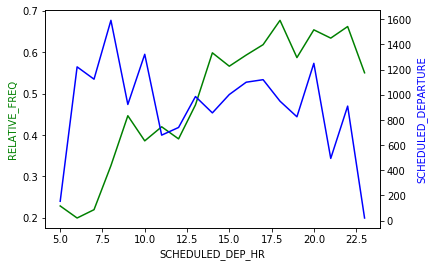

In [48]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(MD_depdelay['SCHEDULED_DEP_HR'], MD_depdelay['RELATIVE_FREQ'], 'g-')
ax2.plot(MD_depdelay['SCHEDULED_DEP_HR'], MD_depdelay['SCHEDULED_DEPARTURE'], 'b-')

ax1.set_xlabel('SCHEDULED_DEP_HR')
ax1.set_ylabel('RELATIVE_FREQ', color='g')
ax2.set_ylabel('SCHEDULED_DEPARTURE', color='b')

plt.show()

#### For Maryland, our graph tells us that departure flights are more likely to be delayed when there are a small number of departure flights scheduled. When more flights are scheduled together, the airport actually works better in terms of controlling delays. One reason for this interesting phenomenon is that the airport is probably understaffed when there are only several departure flights for cost-saving purposes.

In [49]:
# Examine DE's flight schedules.
DE_depdelay = p6_delay[p6_delay['STATE']=='DE'].groupby('SCHEDULED_DEP_HR')['SCHEDULED_DEPARTURE','DEPDELAY_CNT'].aggregate(
    {'SCHEDULED_DEPARTURE':'count',
     'DEPDELAY_CNT':'sum'}).reset_index()
DE_depdelay['RELATIVE_FREQ'] = DE_depdelay['DEPDELAY_CNT']/DE_depdelay['SCHEDULED_DEPARTURE']
DE_depdelay = DE_depdelay.sort_values(by='SCHEDULED_DEP_HR')
DE_depdelay

,SCHEDULED_DEP_HR,SCHEDULED_DEPARTURE,DEPDELAY_CNT,RELATIVE_FREQ
0,9,3,2,0.666667
1,10,3,1,0.333333
2,16,1,1,1.000000
3,18,4,1,0.250000
4,19,1,0,0.000000
5,20,5,2,0.400000
6,21,7,4,0.571429


#### Delaware has high delays because there are very few departure flights scheduled. This makes the relative frequency very high easily. Limited airport capacity may also play a role in causing the delay.

In [82]:
# Examine the bottom 3 states flight schedules.
bot_depdelay = p6_delay[(p6_delay['STATE']=='ND') |
                       (p6_delay['STATE']=='WY') |
                       (p6_delay['STATE']=='MT')].groupby(['STATE','SCHEDULED_DEP_HR'])['SCHEDULED_DEPARTURE','DEPDELAY_CNT'].aggregate(
    {'SCHEDULED_DEPARTURE':'count',
     'DEPDELAY_CNT':'sum'}).reset_index()

bot_depdelay['RELATIVE_FREQ'] = bot_depdelay['DEPDELAY_CNT']/bot_depdelay['SCHEDULED_DEPARTURE']
bot_depdelay = bot_depdelay.sort_values(by=['STATE','SCHEDULED_DEP_HR'])
bot_depdelay

,STATE,SCHEDULED_DEP_HR,SCHEDULED_DEPARTURE,DEPDELAY_CNT,RELATIVE_FREQ
0,MT,5,175,23,0.131429
1,MT,6,666,42,0.063063
2,MT,7,322,59,0.183230
3,MT,8,38,10,0.263158
4,MT,9,21,5,0.238095
5,MT,10,65,16,0.246154
6,MT,11,113,20,0.176991
7,MT,12,174,58,0.333333
8,MT,13,611,166,0.271686
9,MT,14,198,54,0.272727


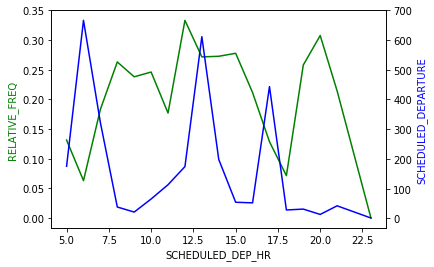

In [51]:
# Extract data for MT and visualize.
MT_depdelay = bot_depdelay.iloc[:18,:]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(MT_depdelay['SCHEDULED_DEP_HR'], MT_depdelay['RELATIVE_FREQ'], 'g-')
ax2.plot(MT_depdelay['SCHEDULED_DEP_HR'], MT_depdelay['SCHEDULED_DEPARTURE'], 'b-')

ax1.set_xlabel('SCHEDULED_DEP_HR')
ax1.set_ylabel('RELATIVE_FREQ', color='g')
ax2.set_ylabel('SCHEDULED_DEPARTURE', color='b')

plt.show()

#### Montana's airport is quite good at preventing delays even with great variations in the number of departure flights. This means that the capacity, staffing, and management capabilities of the airport match the demand pretty well. This is why Montana has the lowest average delay of all. However, a potential weakness of this airport is that delay frequency can be equally high when there is a lot of flights or when there is few flights.

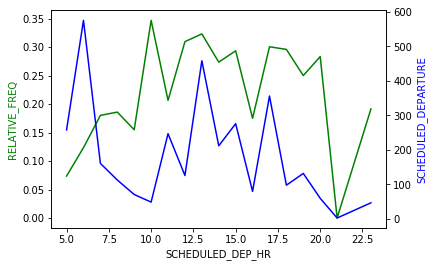

In [52]:
# Extract data for ND and visualize.
ND_depdelay = bot_depdelay.iloc[18:36,:]
ND_depdelay

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(ND_depdelay['SCHEDULED_DEP_HR'], ND_depdelay['RELATIVE_FREQ'], 'g-')
ax2.plot(ND_depdelay['SCHEDULED_DEP_HR'], ND_depdelay['SCHEDULED_DEPARTURE'], 'b-')

ax1.set_xlabel('SCHEDULED_DEP_HR')
ax1.set_ylabel('RELATIVE_FREQ', color='g')
ax2.set_ylabel('SCHEDULED_DEPARTURE', color='b')

plt.show()

#### North Dakota's absolute number of delays and relative frequency tend to move together. This indicates that the airport's ability to manage departure delays stays quite stable, which is why it is the airport with the second lowest average delays.

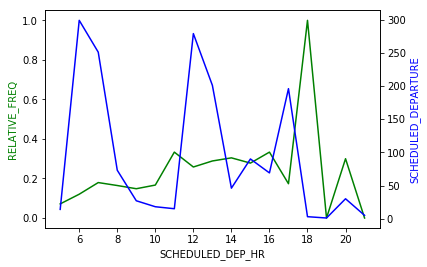

In [53]:
# Extract data for WY and visualize.
WY_depdelay = bot_depdelay.iloc[36:,:]
WY_depdelay

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(WY_depdelay['SCHEDULED_DEP_HR'], WY_depdelay['RELATIVE_FREQ'], 'g-')
ax2.plot(WY_depdelay['SCHEDULED_DEP_HR'], WY_depdelay['SCHEDULED_DEPARTURE'], 'b-')

ax1.set_xlabel('SCHEDULED_DEP_HR')
ax1.set_ylabel('RELATIVE_FREQ', color='g')
ax2.set_ylabel('SCHEDULED_DEPARTURE', color='b')

plt.show()

#### Wyoming's departure delay frequency stays generally low except at around 18:00 when there are only 3 flights and all of them get delayed. This, like Maryland, is probabaly because the airport is understaffed when the are a few flights. Overall, Wyoming's capabilities of managing delays are pretty good.

## 6.2 State-based arrival analysis

In [69]:
# Examine state-based arrival flight delays. Join IATA_CODE in airports and DESTINATION_AIRPORT.
p6_delay_des = pd.merge(p5,airports,left_on='DESTINATION_AIRPORT',right_on='IATA_CODE',how='left')

In [70]:
p6_arrdelay = p6_delay_des.groupby(['STATE'])['ARRDELAY_CNT','SCHEDULED_ARRIVAL'].aggregate(
                    {'ARRDELAY_CNT':'sum',
                     'SCHEDULED_ARRIVAL':'count'}).reset_index()
p6_arrdelay['RELATIVE_FREQ'] = p6_arrdelay['ARRDELAY_CNT']/p6_arrdelay['SCHEDULED_ARRIVAL']
p6_arrdelay_top3 = p6_arrdelay.sort_values(by='RELATIVE_FREQ',ascending=False).head(3)
p6_arrdelay_top3

,STATE,ARRDELAY_CNT,SCHEDULED_ARRIVAL,RELATIVE_FREQ
11,GU,38,59,0.644068
8,DE,15,26,0.576923
3,AS,9,20,0.450000


In [71]:
p6_arrdelay_bot3 = p6_arrdelay.sort_values(by='RELATIVE_FREQ',ascending=False).tail(3)
p6_arrdelay_bot3

,STATE,ARRDELAY_CNT,SCHEDULED_ARRIVAL,RELATIVE_FREQ
53,WY,502,1585,0.316719
10,GA,22158,72074,0.307434
46,UT,5994,19897,0.301251


### We can see that for arrival, the top three states with highest average flight delays are GU (Guam), DE (Delaware), and AS (American Samoa). The top three states with lowest average flight delays are WY (Wyoming), GA (Georgia), and UT (Utah). 

In [72]:
# Examine the top 3 states flight schedules.
top_arrdelay = p6_delay[(p6_delay['STATE']=='GU') |
                       (p6_delay['STATE']=='DE') |
                       (p6_delay['STATE']=='AS')].groupby(['STATE','SCHEDULED_ARR_HR'])['SCHEDULED_ARRIVAL','ARRDELAY_CNT'].aggregate(
    {'SCHEDULED_ARRIVAL':'count',
     'ARRDELAY_CNT':'sum'}).reset_index()

top_arrdelay['RELATIVE_FREQ'] = top_arrdelay['ARRDELAY_CNT']/top_arrdelay['SCHEDULED_ARRIVAL']
top_arrdelay = top_arrdelay.sort_values(by=['STATE','SCHEDULED_ARR_HR'])
top_arrdelay

,STATE,SCHEDULED_ARR_HR,SCHEDULED_ARRIVAL,ARRDELAY_CNT,RELATIVE_FREQ
0,AS,5,25,15,0.600000
1,DE,12,6,4,0.666667
2,DE,18,1,1,1.000000
3,DE,20,4,1,0.250000
4,DE,21,1,0,0.000000
5,DE,23,12,5,0.416667
6,GU,17,41,23,0.560976
7,GU,18,21,2,0.095238


#### American Samoa only has arrival flights in the hour of 5:00. This means that the airport is very likely to exceed its capacity during that hour. So the delay is very high.

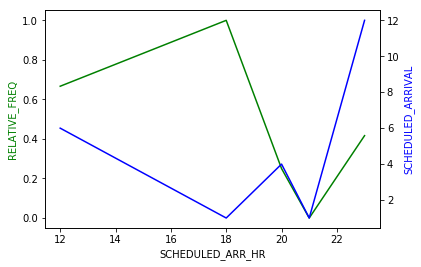

In [58]:
# Examine DE's flight schedules.
DE_arrdelay = top_arrdelay.iloc[1:6,:]
DE_arrdelay

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(DE_arrdelay['SCHEDULED_ARR_HR'], DE_arrdelay['RELATIVE_FREQ'], 'g-')
ax2.plot(DE_arrdelay['SCHEDULED_ARR_HR'], DE_arrdelay['SCHEDULED_ARRIVAL'], 'b-')

ax1.set_xlabel('SCHEDULED_ARR_HR')
ax1.set_ylabel('RELATIVE_FREQ', color='g')
ax2.set_ylabel('SCHEDULED_ARRIVAL', color='b')

plt.show()

#### The same reason explaining why Delaware has high departure delay also applies to its arrival delay ranking. It is interesting to know that when there is only one flight, the airport can manage the delay at during the hour of 18:00 but cannot avoid delay later during the hour of 21:00. The analysis Guam is similar to the one discussed in departure. 

In [83]:
# Examine the bottom 3 states flight schedules.
bot_arrdelay = p6_delay[(p6_delay['STATE']=='WY') |
                       (p6_delay['STATE']=='GA') |
                       (p6_delay['STATE']=='UT')].groupby(['STATE','SCHEDULED_ARR_HR'])['SCHEDULED_ARRIVAL','ARRDELAY_CNT'].aggregate(
    {'SCHEDULED_ARRIVAL':'count',
     'ARRDELAY_CNT':'sum'}).reset_index()

bot_arrdelay['RELATIVE_FREQ'] = bot_arrdelay['ARRDELAY_CNT']/bot_arrdelay['SCHEDULED_ARRIVAL']
bot_arrdelay = bot_arrdelay.sort_values(by=['STATE','SCHEDULED_ARR_HR'])
bot_arrdelay

,STATE,SCHEDULED_ARR_HR,SCHEDULED_ARRIVAL,ARRDELAY_CNT,RELATIVE_FREQ
0,GA,0,1111,401,0.360936
1,GA,1,4,3,0.750000
2,GA,6,377,80,0.212202
3,GA,7,645,178,0.275969
4,GA,8,2311,680,0.294245
5,GA,9,4136,1269,0.306818
6,GA,10,4755,1462,0.307466
7,GA,11,5642,1610,0.285360
8,GA,12,4960,1376,0.277419
9,GA,13,4340,1268,0.292166


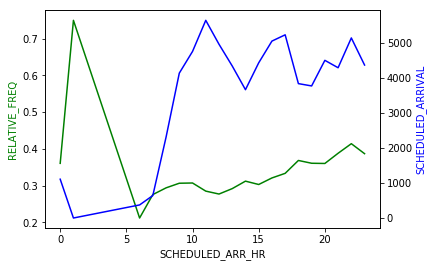

In [77]:
# Examine GA's flight schedules.
GA_arrdelay = bot_arrdelay.iloc[:20,:]
GA_arrdelay

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(GA_arrdelay['SCHEDULED_ARR_HR'], GA_arrdelay['RELATIVE_FREQ'], 'g-')
ax2.plot(GA_arrdelay['SCHEDULED_ARR_HR'], GA_arrdelay['SCHEDULED_ARRIVAL'], 'b-')

ax1.set_xlabel('SCHEDULED_ARR_HR')
ax1.set_ylabel('RELATIVE_FREQ', color='g')
ax2.set_ylabel('SCHEDULED_ARRIVAL', color='b')

plt.show()

#### Georgia does a really good job controlling arrival delays later in the day when there are many arrival flights. However, delays can be very likely when it's around 1 am because there is a very few flights and may be a very few airport crew as well.

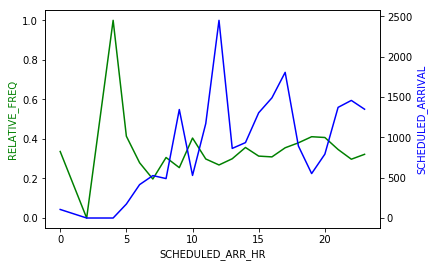

In [78]:
# Examine UT's flight schedules.
UT_arrdelay = bot_arrdelay.iloc[20:42,:]
UT_arrdelay

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(UT_arrdelay['SCHEDULED_ARR_HR'], UT_arrdelay['RELATIVE_FREQ'], 'g-')
ax2.plot(UT_arrdelay['SCHEDULED_ARR_HR'], UT_arrdelay['SCHEDULED_ARRIVAL'], 'b-')

ax1.set_xlabel('SCHEDULED_ARR_HR')
ax1.set_ylabel('RELATIVE_FREQ', color='g')
ax2.set_ylabel('SCHEDULED_ARRIVAL', color='b')

plt.show()

#### Utah, like Georgia, is effective in controlling the delay rate when there are lots of flights, and is relatively less effective early in the day when there are a few flights. Analysis for Wyoming is similar to that in the departure delay section.

# 7. Taxi time in the flight is most frustrating experience to me. Can you let me know which airports I should avoid and which ones I should prefer? Answer this based on average taxi time (both taxi in and taxi out)?

In [104]:
# Taxi in means the flight is arriving, so we use the arrival data in problem 6.
p7_taxin = p6_delay_des

In [116]:
p7_taxin_airports = p7_taxin.groupby('DESTINATION_AIRPORT')['TAXI_IN'].aggregate('mean').reset_index().sort_values(by='TAXI_IN',ascending=False)
p7_taxin_airports.head()

,DESTINATION_AIRPORT,TAXI_IN
535,ORD,13.217535
217,13930,12.352822
82,11298,12.239586
483,LAX,11.707844
166,12892,11.654129


In [106]:
p7_taxin_airports_fn = pd.merge(p7_taxin_airports, airports, left_on='DESTINATION_AIRPORT', right_on = 'IATA_CODE', how = 'inner')
p7_taxin_airports_fn = p7_taxin_airports_fn[['AIRPORT', 'TAXI_IN']] 
p7_taxin_airports_fn.head(5)

,AIRPORT,TAXI_IN
0,Chicago O'Hare International Airport,13.217535
1,Los Angeles International Airport,11.707844
2,Dallas/Fort Worth International Airport,11.572490
3,Newark Liberty International Airport,9.724922
4,Charlotte Douglas International Airport,9.620866


In [110]:
p7_taxin_airports_fn.tail(5)

,AIRPORT,TAXI_IN
317,San Angelo Regional Airport (Mathis Field),2.952830
318,Toledo Express Airport,2.698925
319,Coastal Carolina Regional Airport (Craven Coun...,2.685185
320,Canyonlands Field,2.657143
321,Valdez Airport,2.485714


### In terms of the average taxi-in time, if possible, you should avoid Chicago O'Hare International Airport, Los Angeles International Airport, Dallas/Fort Worth International Airport, Newark Liberty International Airport, and Charlotte Douglas International Airport	because they are the top 5 airports with the longest average taxi-in time.	With the same logic, you should prefer San Angelo Regional Airport, Toledo Express Airport, Coastal Carolina Regional Airport, Canyonlands Field, and Valdez Airport because they have the shortest taxi-in time.

In [112]:
# Taxi out means the flight is departing, so we use the departure data in problem 6.
p7_taxiout = p6_delay

In [113]:
p7_taxout_airports = p7_taxiout.groupby('ORIGIN_AIRPORT')['TAXI_OUT'].aggregate('mean').reset_index().sort_values(by='TAXI_OUT',ascending=False)
p7_taxout_airports

,ORIGIN_AIRPORT,TAXI_OUT
471,JFK,27.004081
205,13502,26.666667
487,LGA,26.605136
170,12953,26.340224
466,ITH,25.000000
154,12478,23.824235
514,MMH,22.333333
543,PHL,21.756677
41,10739,20.923077
67,11109,20.420168


In [114]:
p7_taxiout_airports_fn = pd.merge(p7_taxout_airports, airports, left_on='ORIGIN_AIRPORT', right_on = 'IATA_CODE', how = 'inner')
p7_taxiout_airports_fn = p7_taxiout_airports_fn[['AIRPORT', 'TAXI_OUT']] 
p7_taxiout_airports_fn.head(5)

,AIRPORT,TAXI_OUT
0,John F. Kennedy International Airport (New Yor...,27.004081
1,LaGuardia Airport (Marine Air Terminal),26.605136
2,Ithaca Tompkins Regional Airport,25.000000
3,Mammoth Yosemite Airport,22.333333
4,Philadelphia International Airport,21.756677


In [115]:
p7_taxiout_airports_fn.tail(5)

,AIRPORT,TAXI_OUT
317,Bethel Airport,7.056497
318,Valdez Airport,7.021739
319,Nome Airport,6.824000
320,Canyonlands Field,6.500000
321,Kodiak Airport,6.159574


### In terms of the average taxi-out time, if possible, you should avoid John F. Kennedy International Airport, LaGuardia Airport, Ithaca Tompkins Regional Airport, Mammoth Yosemite Airport, and Philadelphia International Airport because they are the top 5 airports with the longest average taxi-out time. With the same logic, you should prefer Bethel Airport, Valdez Airport, Nome Airport, Canyonlands Field, and Kodiak Airport because they have the shortest taxi-out time.